# Manuscript Figure 1
The comparison of mean-field and SIS pairwise endemic equilibrium with iid $[I^*]$ boxplots
This work will prove our $[I^*]$s solved by SIS pairwise model are satisfied with the boxplots generated from stochastic simulations when epidemics spreading on network
Results can only be amended in Plotting Section II for display reasons otherwise it takes times to complete the run when changing Model parameter values. The run can be longer with large N and Tmax.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import EoN, math, scipy

colour_set = ['#398564', '#fc3468', '#107dac', '#c68642', '#800080']
marker_arr = np.array(['o', 's', '*'])
np.set_printoptions(precision=4)

# Model parameters
Parameter of original work: $N = 10000, T_{max} = 1000, n_{max} = 20 \text{(maxmeanlink)},$
$\tau = 0.10, 0.25, 0.50, \gamma = 1, I_0 = N-1, \phi = 0$.
ignore $I_0$ = N_inf_init, unless applying inf_init = random.sample(sorted(G.nodes()), N_inf_init) instead of the current init_inf = G.nodes()

In [ ]:
N = 10**4
Tmax = 10**3
maxmeanlink = 20

tau_arr = np.array([.10, .25, .50])
gamma = 1
N_inf_init = N-1
phi = 0

In [ ]:
nrange_int = np.arange(1, maxmeanlink+1)
nrange_xaxis = np.arange(0.01, maxmeanlink+.1, 0.01)

# Define the geometric network

In [2]:
def Geometric_network(N, n, geom_degseq):
    while abs( sum(geom_degseq)/len(geom_degseq) - n ) > 0.01:
        sum_degseq = 1
        while sum_degseq % 2 > 0:
            geom_degseq = scipy.stats.geom.rvs(1./n, loc=0, size=N)
            sum_degseq = sum(geom_degseq)
        G_geom = nx.configuration_model(geom_degseq)
        G_geom = nx.Graph(G_geom)
        G_geom.remove_edges_from(nx.selfloop_edges(G_geom))
        geom_degseq = sorted((d for n, d in G_geom.degree()), reverse=False)
    return G_geom

# Create the stochastic simulation when running the epidemics on network
1. Create a network of $N$ nodes with mean links per node $n$.
2. Assign the disease status S, I at time $T=0$ to each node.
3. Run the epidemics on network by using EoN package.

In [3]:
def plots_SIS_EoN_dynamics_ER(N, n, N_inf_init, tau, gamma, Tmax):
    G = nx.fast_gnp_random_graph( N, n/(N-1) )
    init_inf = G.nodes()
    t, S, I = EoN.fast_SIS(G, tau, gamma, initial_infecteds=init_inf, tmax=Tmax)
    return t, S, I

def plots_SIS_EoN_dynamics_nreg(N, n, N_inf_init, tau, gamma, Tmax):
    G = nx.random_regular_graph( n, N )
    init_inf = G.nodes()
    t, S, I = EoN.fast_SIS(G, tau, gamma, initial_infecteds=init_inf, tmax=Tmax)
    return t, S, I

def plots_SIS_EoN_dynamics_geom(N, n, N_inf_init, tau, gamma, Tmax):
    geom_degseq = [0, 0]
    G = Geometric_network(N, n, geom_degseq)
    init_inf = G.nodes()
    t, S, I = EoN.fast_SIS(G, tau, gamma, initial_infecteds=init_inf, tmax=Tmax)
    return t, S, I

# Extract the iid infected population to compare with an analytical result
by using burn-in and thinning process

In [4]:
def burn_in_array(t, I,):
    t_burn = t[int(len(t)/2):-1]-t[int(len(t)/2)]
    I_burn = I[int(len(t)/2):-1]
    return t_burn, I_burn

def thinning(t, I, thin_step):
    t_thin = []
    I_thin = []
    for i in range(len(t)):
        if i % thin_step == 0:
            t_thin.append(t[i])
            I_thin.append(I[i])
    return t_thin, I_thin

def thinning_int(t, I):
    if t[-1] % 1 == 0:
        t_thin_int = np.arange( t[-1]+1 )
    else:
        t_thin_int = np.arange( math.ceil(t[-1]) )

    I_thin_arr = np.zeros(len(t_thin_int))
    I_thin_arr[0] = I[0]

    if len(I_thin_arr) > len(t):
        t_modify = np.append(t, np.ones( len(I_thin_arr)-len(t) )*t[-1] )
    else:
        t_modify = t_thin_int

    for i in np.arange(1, len(t_modify)):
        k = 0
        while k < len(t_modify):
            if t_thin_int[i] >= t_modify[i-k]:
                I_thin_arr[i] = I[i-k]
                break
            k += 1
    return t_thin_int, I_thin_arr

def time_interval_avg(t):
    return t[-1]/(len(t)-1)

# Analytical results: Mean-field and Pairwise endemic equilibrium

In [5]:
def Istar_MF(N, ntau, gamma):
    Istar_mf = N*(1 - (gamma/(ntau)))
    Istar_mf[ntau < gamma] = 0
    return Istar_mf

def Istar_PW(N, n, tau, gamma, kappa):
    numlink_value = n*N
    first_term = ( tau *kappa* numlink_value + 2*gamma*kappa*N + tau *kappa*N - 2*gamma*N)
    sqrt_term  = (4*gamma*N*(kappa* numlink_value - numlink_value+N) + tau *(N-numlink_value)**2)
    denom      = 2*(gamma*kappa**2 + gamma - 2*gamma*kappa - tau *kappa)

    Istar_pos = ( (-1)*first_term + kappa*(tau * sqrt_term)**(1/2) ) / denom
    Istar_pos[n*tau*kappa < gamma] = 0
    return Istar_pos

# Plotting section I
1. The number of infected population $I_t$ with mean links $n$ and $t_{end} = T_{max}$
2. Thinned value of $[I^*]$

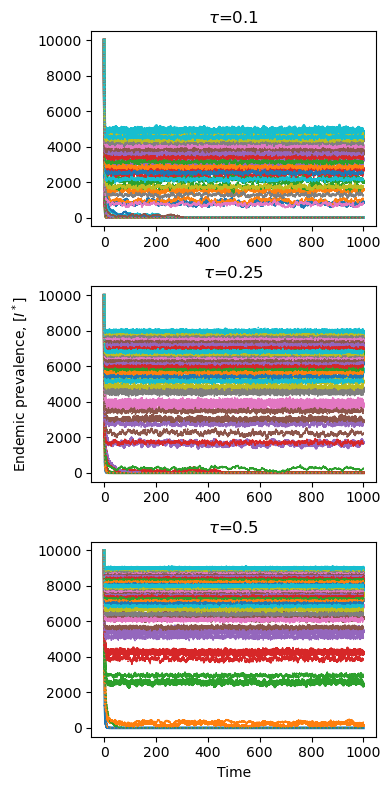

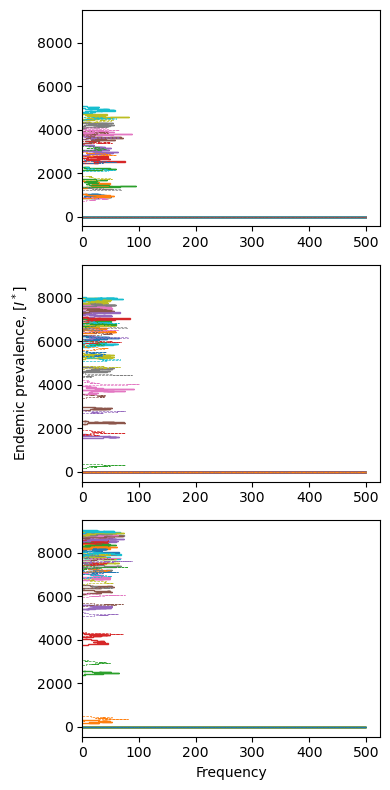

In [7]:
fig2, axs2 = plt.subplots(len(tau_arr), 1, figsize=(4, 8), sharey=True)
axs2[1].set(ylabel=r'Endemic prevalence, $[I^*]$')
axs2[2].set(xlabel=r'Time')

fig3, axs3 = plt.subplots(len(tau_arr), 1, figsize=(4, 8), sharey=True)
axs3[1].set(ylabel=r'Endemic prevalence, $[I^*]$')
axs3[2].set(xlabel=r'Frequency')


dataI_ER    = []
dataI_nreg  = []
dataI_geom  = []


# ERDOS-RENYI NETWORK
for tau_index in np.arange(len(tau_arr)):
    for n_index in np.arange(len(nrange_int)):
        t, S, I = plots_SIS_EoN_dynamics_ER(N, nrange_int[n_index], N_inf_init, tau_arr[tau_index], gamma, Tmax)
        if abs(Tmax - t[-1]) > 1:
            while Tmax - ( t[-1] + time_interval_avg(t) ) > 0.1:
                t = np.append(t, t[-1] + time_interval_avg(t) )
                I = np.append(I, I[-1])
        axs2[tau_index].plot(t, I, linestyle='-', linewidth=2, label=r'$n=$'+str(nrange_int[n_index])+', ER')
        axs2[tau_index].set_title(r'$\tau$='+str(tau_arr[tau_index]) )

        t_burn, I_burn = burn_in_array(t, I)
        t_thin, I_thin = thinning(t_burn, I_burn, thin_step=int(Tmax/20) )   
        t_thinning_int, I_thinning_arr = thinning_int(t_thin, I_thin)
        
        dataI_ER = dataI_ER + [list(I_thinning_arr)]
        axs3[tau_index].hist(I_thinning_arr, 20, histtype='step', linestyle='-', lw=1, orientation='horizontal', label=r'Erdős-Rényi')
dataI_ER = np.array(dataI_ER, dtype=object)
dataI_ER = dataI_ER.reshape(len(tau_arr), len(nrange_int))


# n-REGULAR NETWORK
for tau_index in np.arange(len(tau_arr)):
    for n_index in np.arange(len(nrange_int)):
        t, S, I = plots_SIS_EoN_dynamics_nreg(N, nrange_int[n_index], N_inf_init, tau_arr[tau_index], gamma, Tmax)
        if abs(Tmax - t[-1]) > 1:
            while Tmax - ( t[-1] + time_interval_avg(t) ) > 0.1:
                t = np.append(t, t[-1] + time_interval_avg(t) )
                I = np.append(I, I[-1])
        axs2[tau_index].plot(t, I, linestyle='dotted', linewidth=1, label=''+str(nrange_int[n_index])+'-regular' )
        axs2[tau_index].set_title(r'$\tau$='+str(tau_arr[tau_index]) )

        t_burn, I_burn = burn_in_array(t, I)
        t_thin, I_thin = thinning(t_burn, I_burn, thin_step=int(Tmax/20) )
        t_thinning_int, I_thinning_arr = thinning_int(t_thin, I_thin)
        
        dataI_nreg = dataI_nreg + [list(I_thinning_arr)]
        axs3[tau_index].hist(I_thinning_arr, 20, histtype='step', linestyle='-', lw=1, orientation='horizontal', label=r'$n$-regular')
dataI_nreg = np.array(dataI_nreg, dtype=object)
dataI_nreg = dataI_nreg.reshape(len(tau_arr), len(nrange_int))


# GEOMETRIC NETWORK
for tau_index in np.arange(len(tau_arr)):
    for n_index in np.arange(len(nrange_int)):
        t, S, I = plots_SIS_EoN_dynamics_geom(N, nrange_int[n_index], N_inf_init, tau_arr[tau_index], gamma, Tmax)
        if abs(Tmax - t[-1]) > 1:
            while Tmax - ( t[-1] + time_interval_avg(t) ) > 0.1:
                t = np.append(t, t[-1] + time_interval_avg(t) )
                I = np.append(I, I[-1])
        axs2[tau_index].plot(t, I, linestyle='dotted', linewidth=1, label=r'$n=$'+str(nrange_int[n_index])+', geom' )
        axs2[tau_index].set_title(r'$\tau$='+str(tau_arr[tau_index]) )

        t_burn, I_burn = burn_in_array(t, I)
        t_thin, I_thin = thinning(t_burn, I_burn, thin_step=int(Tmax/20) )
        t_thinning_int, I_thinning_arr = thinning_int(t_thin, I_thin)
        
        dataI_geom = dataI_geom + [list(I_thinning_arr)]
        axs3[tau_index].hist(I_thinning_arr, 20, histtype='step', linestyle='--', lw=0.5, orientation='horizontal', label=r'Geometric')
dataI_geom = np.array(dataI_geom, dtype=object)
dataI_geom = dataI_geom.reshape(len(tau_arr), len(nrange_int))

fig2.tight_layout()
fig3.tight_layout()

# Plotting section II
The comparison of mean-field and pairwise endemic equilibrium with iid $[I^*]$ boxplots

/tmp/ipykernel_1159131/2537947567.py:12: RuntimeWarning: invalid value encountered in sqrt
  Istar_pos = ( (-1)*first_term + kappa*(tau * sqrt_term)**(1/2) ) / denom
/tmp/ipykernel_1159131/2537947567.py:12: RuntimeWarning: divide by zero encountered in divide
  Istar_pos = ( (-1)*first_term + kappa*(tau * sqrt_term)**(1/2) ) / denom


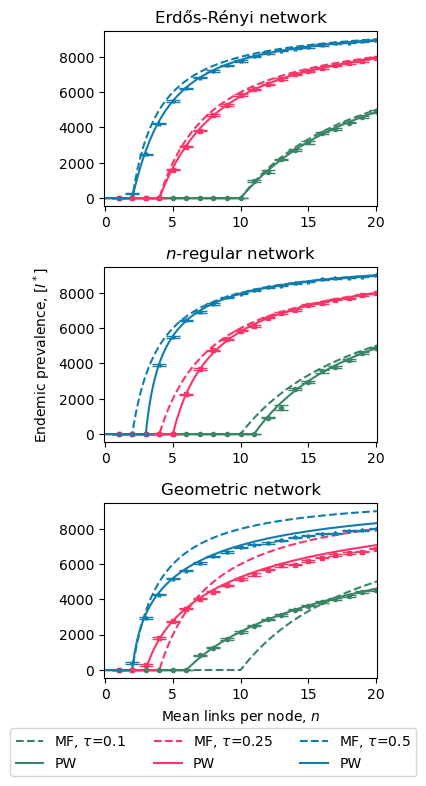

In [20]:
fig4, axs4 = plt.subplots(len(tau_arr), 1, figsize=(4, 8), sharey=True)
axs4[1].set(ylabel=r'Endemic prevalence, $[I^*]$')
axs4[2].set(xlabel=r'Mean links per node, $n$')

axs4[0].set_title(r'Erdős-Rényi network')
axs4[1].set_title(r'$n$-regular network')
axs4[2].set_title(r'Geometric network')

for i in range(3):
    axs4[i].set_xlim(-0.1, maxmeanlink+.1)

for tau_index in np.arange(len(tau_arr)):
    for n_index in np.arange(len(nrange_int)):
        axs4[0].errorbar(n_index+1, np.mean(dataI_ER[tau_index][n_index]), yerr=np.std(dataI_ER[tau_index][n_index]),
                         color=colour_set[tau_index], fmt=marker_arr[tau_index], linestyle='-', markersize=3, capsize=5)
        axs4[1].errorbar(n_index+1, np.mean(dataI_nreg[tau_index][n_index]), yerr=np.std(dataI_nreg[tau_index][n_index]),
                         color=colour_set[tau_index], fmt=marker_arr[tau_index], linestyle='-', markersize=3, capsize=5)
        axs4[2].errorbar(n_index+1, np.mean(dataI_geom[tau_index][n_index]), yerr=np.std(dataI_geom[tau_index][n_index]),
                         color=colour_set[tau_index], fmt=marker_arr[tau_index], linestyle='-', markersize=3, capsize=5)

    Istar_mf = Istar_MF(N, nrange_xaxis*tau_arr[tau_index], gamma)
    for i in range(3):
        axs4[i].plot(nrange_xaxis, Istar_mf, colour_set[tau_index], linestyle='--', label=r'MF, $\tau$='+str(tau_arr[tau_index]))

    Istar_pos_ER   = Istar_PW(N, nrange_xaxis, tau_arr[tau_index], gamma, 1)
    Istar_pos_nreg = Istar_PW(N, nrange_xaxis, tau_arr[tau_index], gamma, (nrange_xaxis-1)/nrange_xaxis )
    Istar_pos_geom = Istar_PW(N, nrange_xaxis, tau_arr[tau_index], gamma, 2*(nrange_xaxis-1)/nrange_xaxis )

    axs4[0].plot(nrange_xaxis, Istar_pos_ER, colour_set[tau_index], linestyle='-', label=r'PW')
    axs4[1].plot(nrange_xaxis, Istar_pos_nreg, colour_set[tau_index], linestyle='-', label=r'PW')
    axs4[2].plot(nrange_xaxis, Istar_pos_geom, colour_set[tau_index], linestyle='-', label=r'PW')


plt.legend(ncol=3, bbox_to_anchor=(0.40,-.6), loc='lower center')

fig4.tight_layout()